# Red Wine Quality Analysis

In this analysis I'm using a dataset available on [Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)  
The dataset provides data on different chemical properties of different kinds of red wine and provides a quality rating for each wine. In this analysis a model will be created to estimate the quality of the wine given the chemical properties to the highest accuracy possible. We will also analyze different techniques of classification and compare the results.

Import the basic libraries

In [1]:
import pandas as pd
import numpy as np

Import the CSV file and scan the information about the dataset

In [2]:
raw_data = pd.read_csv("datasets_4458_8204_winequality-red.csv")
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
raw_data.shape

(1599, 12)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
raw_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Lets check if any there is any strong correlation between any of the variables, if so it would imply one variable is a function of the other and one of them may be ignored.

In [6]:
import seaborn as sns


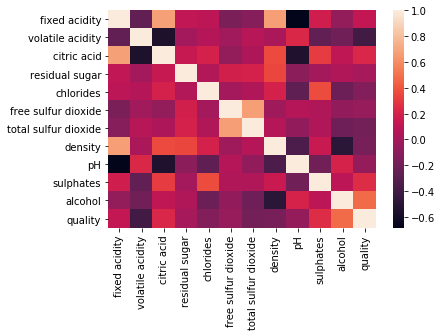

In [7]:
corrmatrix = raw_data.corr()
sns.heatmap(corrmatrix,annot = False)

The correlation matrix doesn't indicate any strong correlation

## Data Preprocessing

First let's seperate the inputs and targets

In [8]:
input_data = raw_data.copy()
input_data.drop(["quality"],inplace=True,axis=1)
input_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Normalize the Input Variables

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
input_data = StandardScaler().fit(input_data).transform(input_data)

In [11]:
input_data

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [12]:
target_data = raw_data.iloc[:,-1:]["quality"]
target_data

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

Split training and testing sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(input_data,target_data, test_size=0.20,random_state = 15)

Create an accuracy measure to allow for a minimal error

In [15]:
Accuracylist = []
ErrorAccuracylist=[]

In [16]:
def allowerror(p,pred,true):
    check = 0
    for i,k in zip(pred,true):
        if abs(i-k) <=p:
            check +=1
    return (check/len(pred))       

-------------------------------------------------------------------------------------------------------------------------------

## Data Analysis

### K-Nearest Neighbour

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
target_data.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'K')]

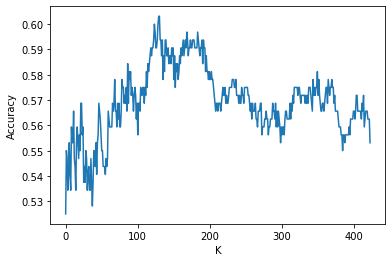

In [20]:
maxnum = 0
array =[]
p = int(len(X_train))
for i in range(3,int(p/3)):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    output = knn.predict(X_test)
    kacc = accuracy_score(y_test,output)
    array.append(kacc)
index = np.arange(0,len(array),1)
sns.lineplot(index,array).set(xlabel='K', ylabel='Accuracy')

The plot shows us the Variation of accuracy with different values of K in KNN method.

In [21]:
for i in range(len(array)):
    if array[i] == max(array):
        K = i+3
knn = KNeighborsClassifier(n_neighbors=K).fit(X_train,y_train)
knn_output = knn.predict(X_test)
acc = accuracy_score(y_test,knn_output)
Accuracylist.append(acc)
ErrorAccuracylist.append(allowerror(1,y_test,knn_output))
print("Highest Accuracy with KNN = ", acc,"using k =",K)

Highest Accuracy with KNN =  0.603125 using k = 133


--------------------------------------------------------------------------------------------------------------------------------

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train,y_train)

E:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
logistic_output = model.predict(X_test)
acc = accuracy_score(y_test,logistic_output)
Accuracylist.append(acc)
ErrorAccuracylist.append(allowerror(1,y_test,logistic_output))
print("Accuracy with LogisticRegression = ", acc)

Accuracy with LogisticRegression =  0.59375


--------------------------------------------------------------------------------------------------------------------------------

### Support Vector Machine

In [25]:
from sklearn import svm

In [26]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
svm_output = clf.predict(X_test)
acc = accuracy_score(y_test,svm_output)
Accuracylist.append(acc)
ErrorAccuracylist.append(allowerror(1,y_test,svm_output))
print("Accuracy with Support Vector Machine = ", acc)

Accuracy with Support Vector Machine =  0.615625


-------------------------------------------------------------------------------------------------------------------------------

### Decision Tree Classifier

In [28]:
from sklearn import tree

In [29]:
tlf = tree.DecisionTreeClassifier(max_depth=5)
tlf = tlf.fit(X_train,y_train)

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'max depth')]

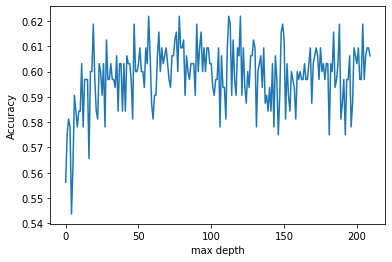

In [30]:
maxnum = 0
array =[]
p = len(X_train)
for i in range(3,int(p/6)):
    tlf = tree.DecisionTreeClassifier(max_depth=i)
    tlf = tlf.fit(X_train,y_train)
    output = tlf.predict(X_test)
    k = accuracy_score(y_test,output)
    array.append(k)
index = np.arange(0,len(array),1)
sns.lineplot(index,array).set(xlabel='max depth', ylabel='Accuracy')
    


The plot shows us the variation of accuracy with maximum depth of the decision tree

In [31]:
for i in range(len(array)):
    if array[i] is max(array):
        D = i+3
tlf = tree.DecisionTreeClassifier(max_depth=D)
tlf = tlf.fit(X_train,y_train)
DT_output = tlf.predict(X_test)
acc = accuracy_score(y_test,DT_output)
Accuracylist.append(acc)
ErrorAccuracylist.append(allowerror(1,y_test,DT_output))
print("Highest Accuracy with Decision Tree Classifier = ", acc,"using k =",D)

Highest Accuracy with Decision Tree Classifier =  0.603125 using k = 60


-------------------------------------------------------------------------------------------------------------------------------

### Neural Network

In [32]:
import tensorflow as tf

In [33]:
samples_count = input_data.shape[0]



train_samples_count = int(0.7 * samples_count)
validation_samples_count = int(0.1 * samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count

train_inputs = np.array(input_data[:train_samples_count])
train_targets = np.array(target_data[:train_samples_count].apply(lambda x:x-3))

validation_inputs = np.array(input_data[train_samples_count:train_samples_count+validation_samples_count])
validation_targets = np.array(target_data[train_samples_count:train_samples_count+validation_samples_count].apply(lambda x:x-3))

test_inputs = np.array(input_data[train_samples_count+validation_samples_count:])
test_targets = np.array(target_data[train_samples_count+validation_samples_count:].apply(lambda x:x-3))

In [34]:
input_size = input_data.shape[1]
output_size = 6

hidden_layer_size = 12
    

tfmodel = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    #tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 3rd hidden layer
    #tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 4th hidden layer
    #tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 5th hidden layer
    tf.keras.layers.Dense(output_size, activation='sigmoid') # output layer
])
tfmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


batch_size = 5

max_epochs = 100

early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)


tfmodel.fit(train_inputs, 
          train_targets, 
          batch_size=batch_size,
          epochs=max_epochs,
          callbacks=[early_stopping], 
          validation_data=(validation_inputs, validation_targets),
          verbose = 2
          )  


Train on 1119 samples, validate on 159 samples
Epoch 1/100
1119/1119 - 2s - loss: 1.5109 - accuracy: 0.5103 - val_loss: 1.3494 - val_accuracy: 0.5535
Epoch 2/100
1119/1119 - 1s - loss: 1.1059 - accuracy: 0.5648 - val_loss: 1.1395 - val_accuracy: 0.5660
Epoch 3/100
1119/1119 - 1s - loss: 0.9912 - accuracy: 0.5675 - val_loss: 1.0825 - val_accuracy: 0.5723
Epoch 4/100
1119/1119 - 1s - loss: 0.9460 - accuracy: 0.5702 - val_loss: 1.0660 - val_accuracy: 0.5849
Epoch 5/100
1119/1119 - 1s - loss: 0.9284 - accuracy: 0.5809 - val_loss: 1.0448 - val_accuracy: 0.6038
Epoch 6/100
1119/1119 - 1s - loss: 0.9182 - accuracy: 0.5782 - val_loss: 1.0510 - val_accuracy: 0.6101
Epoch 7/100
1119/1119 - 1s - loss: 0.9100 - accuracy: 0.5836 - val_loss: 1.0533 - val_accuracy: 0.5975


In [35]:
test_loss, test_accuracy = tfmodel.evaluate(test_inputs,test_targets)

321/321 [==============================] - 0s 101us/sample - loss: 1.0404 - accuracy: 0.6168


In [36]:
Accuracylist.append(test_accuracy)
ErrorAccuracylist.append("NA")

In [37]:
print("Accuracy achieved with Neural Network = " ,test_accuracy) 

Accuracy achieved with Neural Network =  0.6168224


-------------------------------------------------------------------------------------------------------------------------------

### Linear Regression

Using a Linear Regression and rounding off the result to the nearest quality basket

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
LR = LinearRegression().fit(X_train,y_train)

In [40]:
LR_output = LR.predict(X_test)

In [41]:
for i in range(len(LR_output)):
    LR_output[i] = int(np.round(LR_output[i]))

acc = accuracy_score(y_test,LR_output)
Accuracylist.append(acc)
ErrorAccuracylist.append(allowerror(1,y_test,LR_output))

    
print("Accuracy with Linear Regression Model = ", acc)    

Accuracy with Linear Regression Model =  0.6


--------------------------------------------------------------------------------------------------------------------------------

## Summary Table

In [42]:
Methods = ["KNN","Logistic Regression","SVM","Decision Tree","Neural Network","Linear Regression"]


In [43]:
summary = pd.DataFrame()

In [44]:
summary["Methods"] = Methods
summary["Accuracy"] = Accuracylist
summary["Accuray with allowed error of 1"] = ErrorAccuracylist

In [45]:
summary

,Methods,Accuracy,Accuray with allowed error of 1
0,KNN,0.603125,0.959375
1,Logistic Regression,0.593750,0.959375
2,SVM,0.615625,0.965625
3,Decision Tree,0.603125,0.940625
4,Neural Network,0.616822,NA
5,Linear Regression,0.600000,0.965625


The Summary Table tells us that the Support Vector Machine was relatively able to classify better and a neural network classifies as good as SVM bur it isn't the the most optimum method for this dataset. We might achieve a better result with a neural network but it would require much more parameter experimenting and it is computationally more expensive.